In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.figsize'] = (16, 8)

In [3]:
filename = 'Массив чеков_ver3.csv'

Для начала прочитаем только заголовки датасета:

In [4]:
headers = pd.read_csv(filename, nrows=0, encoding='utf-16').columns.tolist()
headers

['client_NT',
 'text_kktAddress',
 'Идентификатор покупателя',
 'dateTime',
 'receipt_id',
 'CLEAN_SKU',
 'price_items',
 'quantity_items',
 'sum_items',
 'totalSum',
 'RIGHTHOLDER_NT',
 'BRAND_NT',
 'CLASS_NT',
 'GROUP_NT',
 'CATEGORY_NT',
 'SUBCATEGORY_NT',
 'BASE_NT',
 'lat',
 'lon']

Можно сформировать отдельный список всех магазинов из датасета:

In [5]:
# Сформируем список магазинов из csv-файла, прочитав только колонки 'client_NT', 'text_kktAddress', 'lat', 'lon'
stores = pd.read_csv(filename, usecols=['client_NT', 'text_kktAddress', 'lat', 'lon'], encoding='utf-16').drop_duplicates()
stores

,client_NT,text_kktAddress,lat,lon
0,Окей,"г Москва, ул Озёрная, д 50","55,6647196","37,4372193"
7,Окей,"г Москва, пр-кт Мира, д 211 к 2","55,845855","37,662093"
10,Гиперглобус,"г Москва, ш Новоухтомское, д 2А","55,7128634","37,8454195"
43,Окей,"г Москва, ул Кировоградская, д 13А","55,6121172","37,6070486"
58,Гиперглобус,"г Москва, Сосенское п, п Коммунарка, ул Алекса...","55,557266","37,494368"
109,Окей,"г Москва, ш Каширское, д 14","55,664456","37,627059"
117,Гиперглобус,"г Москва, км Новорижское шоссе 22-й, влд 1 стр 1","55,801981","37,300674"
193,Гиперглобус,"г Москва, км Киевское шоссе 23-й (п Московский...","55,623788","37,422027"
240,Окей,"г Москва, ш Дмитровское, влд 163А к 1","55,90968","37,540721"
250,Окей,"г Москва, ш Головинское, д 5 к 1","55,84016","37,4915995"


И отдельный список торговых сетей:

In [6]:
trades = stores['client_NT'].drop_duplicates()
trades

0               Окей
10       Гиперглобус
26345      Metro c&c
Name: client_NT, dtype: object

In [7]:
# Сохраним результат в csv файл
stores.sort_values(['client_NT', 'text_kktAddress']).to_csv('Список магазинов.csv', index=False, encoding='utf-8')
stores

,client_NT,text_kktAddress,lat,lon
0,Окей,"г Москва, ул Озёрная, д 50","55,6647196","37,4372193"
7,Окей,"г Москва, пр-кт Мира, д 211 к 2","55,845855","37,662093"
10,Гиперглобус,"г Москва, ш Новоухтомское, д 2А","55,7128634","37,8454195"
43,Окей,"г Москва, ул Кировоградская, д 13А","55,6121172","37,6070486"
58,Гиперглобус,"г Москва, Сосенское п, п Коммунарка, ул Алекса...","55,557266","37,494368"
109,Окей,"г Москва, ш Каширское, д 14","55,664456","37,627059"
117,Гиперглобус,"г Москва, км Новорижское шоссе 22-й, влд 1 стр 1","55,801981","37,300674"
193,Гиперглобус,"г Москва, км Киевское шоссе 23-й (п Московский...","55,623788","37,422027"
240,Окей,"г Москва, ш Дмитровское, влд 163А к 1","55,90968","37,540721"
250,Окей,"г Москва, ш Головинское, д 5 к 1","55,84016","37,4915995"


Переопределим некоторые типы данных для экономии места:

In [8]:
dtype_spec = {
    'region': 'category',
    'userInn': 'int64',
    'client_NT': 'category',
    'text_kktAddress': 'category',
    'Идентификатор покупателя': 'str',
    'dateTime': 'str', # после преобразуем в datetime
    'Year': 'int16',
    'Month': 'int16',
    'receipt_id': 'str',
    'CLEAN_SKU': 'str',
    'price_items': 'float32',
    'quantity_items': 'float32',
    'sum_items': 'float32',
    'totalSum': 'float32',
    'RIGHTHOLDER_NT': 'str',
    'BRAND_NT': 'category',
    'CLASS_NT': 'category',
    'GROUP_NT': 'category',
    'CATEGORY_NT': 'category',
    'SUBCATEGORY_NT': 'category',
    'BASE_NT': 'category',
    'lat': 'float32',
    'lon': 'float32'
}

Исходя из примера массива, повторяющиеся строки являются частью одного чека. Значит дубликаты строк не убираем

Загружаем датасет:

In [9]:
data = pd.read_csv(filename, encoding='utf-16', dtype=dtype_spec, decimal=',').reset_index()

Если появляется ошибка памяти, то можно загрузить датасет частями:

In [10]:
# data = pd.DataFrame()
# chunk_size = 1000000
# for chunk in pd.read_csv('Массив чеков_ver2.csv', encoding='utf-16', dtype=dtype_spec, decimal=',', chunksize=chunk_size):
#     data = pd.concat([data, chunk], ignore_index=True)
# data  = data.reset_index()

Посмотрим первые 5 строк, чтобы убедиться, что всё подгрузилось правильно:

In [11]:
data.head(5)

,index,client_NT,text_kktAddress,Идентификатор покупателя,dateTime,receipt_id,CLEAN_SKU,price_items,quantity_items,sum_items,totalSum,RIGHTHOLDER_NT,BRAND_NT,CLASS_NT,GROUP_NT,CATEGORY_NT,SUBCATEGORY_NT,BASE_NT,lat,lon
0,0,Окей,"г Москва, ул Озёрная, д 50",NaN,26.06.2022 13:51:00,9960440300975081:17128,Бананы кг,70.38,0.59,41.81,2135.82,NaN,NaN,ФРОВ,СВЕЖИЕ ФРУКТЫ,ФРУКТЫ ОСНОВНЫЕ,БАНАНЫ,БАНАН,55.66,37.44
1,1,Окей,"г Москва, ул Озёрная, д 50",NaN,26.06.2022 13:46:00,9960440300975081:17126,Зажарка Maggi 60г,33.42,1.00,33.42,3920.33,NESTLE,MAGGI,БАКЛ,БАКАЛЕЯ СЫПУЧАЯ,ПРИПРАВЫ ДЛЯ ПЕРВЫХ И ВТОРЫХ БЛЮД,ПРИПРАВА ДЛЯ ЖАРКОЕ,ПРИПРАВА ДЛЯ ЖАРКОЕ,55.66,37.44
2,2,Окей,"г Москва, ул Озёрная, д 50",NaN,01.05.2022 13:26:00,9960440300975081:11611,Бананы кг,96.24,0.91,87.58,2387.77,NaN,NaN,ФРОВ,СВЕЖИЕ ФРУКТЫ,ФРУКТЫ ОСНОВНЫЕ,БАНАНЫ,БАНАН,55.66,37.44
3,3,Окей,"г Москва, ул Озёрная, д 50",NaN,01.05.2022 13:26:00,9960440300975081:11611,Яблоки кг,87.49,1.30,113.74,2387.77,NaN,NaN,ФРОВ,СВЕЖИЕ ФРУКТЫ,ФРУКТЫ ОСНОВНЫЕ,ЯБЛОКИ,ЯБЛОКО,55.66,37.44
4,4,Окей,"г Москва, ул Озёрная, д 50",NaN,04.06.2022 18:19:00,9960440301010969:5365,Апельсины кг,109.99,1.69,186.10,13641.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.66,37.44


Проверим данные, например, чек номер `9960440300975081:11611`:

In [12]:
check = data[data['receipt_id'] == '9960440300975081:11611']
check

,index,client_NT,text_kktAddress,Идентификатор покупателя,dateTime,receipt_id,CLEAN_SKU,price_items,quantity_items,sum_items,totalSum,RIGHTHOLDER_NT,BRAND_NT,CLASS_NT,GROUP_NT,CATEGORY_NT,SUBCATEGORY_NT,BASE_NT,lat,lon
2,2,Окей,"г Москва, ул Озёрная, д 50",NaN,01.05.2022 13:26:00,9960440300975081:11611,Бананы кг,96.24,0.91,87.58,2387.77,NaN,NaN,ФРОВ,СВЕЖИЕ ФРУКТЫ,ФРУКТЫ ОСНОВНЫЕ,БАНАНЫ,БАНАН,55.66,37.44
3,3,Окей,"г Москва, ул Озёрная, д 50",NaN,01.05.2022 13:26:00,9960440300975081:11611,Яблоки кг,87.49,1.30,113.74,2387.77,NaN,NaN,ФРОВ,СВЕЖИЕ ФРУКТЫ,ФРУКТЫ ОСНОВНЫЕ,ЯБЛОКИ,ЯБЛОКО,55.66,37.44
1342543,1342543,Окей,"г Москва, ул Озёрная, д 50",NaN,01.05.2022 13:26:00,9960440300975081:11611,"Масло льняное Диал-Экспорт нераф 0,5л",182.88,1.00,182.88,2387.77,не определено,DIAL-EXPORT,БАКЛ,РАСТИТЕЛЬНЫЕ МАСЛА,МАСЛО РАСТИТЕЛЬНОЕ,МАСЛО ЛЬНЯНОЕ,МАСЛО ЛЬНЯНОЕ,55.66,37.44
1342544,1342544,Окей,"г Москва, ул Озёрная, д 50",NaN,01.05.2022 13:26:00,9960440300975081:11611,Яблоки Гольден фас пакет кг,102.84,1.35,138.83,2387.77,NaN,NaN,ФРОВ,СВЕЖИЕ ФРУКТЫ,ФРУКТЫ ОСНОВНЫЕ,ЯБЛОКИ,ЯБЛОКО,55.66,37.44
1342545,1342545,Окей,"г Москва, ул Озёрная, д 50",NaN,01.05.2022 13:26:00,9960440300975081:11611,Кофе ТЧН! Растворимый сублимированный 90г,87.49,1.00,87.49,2387.77,СТМ_ОКЕЙ,"ТО, ЧТО НАДО!",ЧКФК,"ЧАЙ, КОФЕ",КОФЕ,КОФЕ РАСТВОРИМЫЙ,КОФЕ РАСТВОРИМЫЙ,55.66,37.44
1342546,1342546,Окей,"г Москва, ул Озёрная, д 50",NaN,01.05.2022 13:26:00,9960440300975081:11611,Бумага туалетная ТЧН! 1слойная/1рулон/вторсырье,10.49,1.00,10.49,2387.77,СТМ_ОКЕЙ,"ТО, ЧТО НАДО!",КЗБХ,УХОД И ГИГИЕНА,ТУАЛЕТНАЯ БУМАГА,ТУАЛЕТНАЯ БУМАГА,БУМАГА ТУАЛЕТНАЯ,55.66,37.44
1342547,1342547,Окей,"г Москва, ул Озёрная, д 50",NaN,01.05.2022 13:26:00,9960440300975081:11611,Бумага туалетная ТЧН! 1слойная/1рулон/вторсырье,10.49,1.00,10.49,2387.77,СТМ_ОКЕЙ,"ТО, ЧТО НАДО!",КЗБХ,УХОД И ГИГИЕНА,ТУАЛЕТНАЯ БУМАГА,ТУАЛЕТНАЯ БУМАГА,БУМАГА ТУАЛЕТНАЯ,55.66,37.44
1342548,1342548,Окей,"г Москва, ул Озёрная, д 50",NaN,01.05.2022 13:26:00,9960440300975081:11611,Бумага туалетная ТЧН! 1слойная/1рулон/вторсырье,10.49,1.00,10.49,2387.77,СТМ_ОКЕЙ,"ТО, ЧТО НАДО!",КЗБХ,УХОД И ГИГИЕНА,ТУАЛЕТНАЯ БУМАГА,ТУАЛЕТНАЯ БУМАГА,БУМАГА ТУАЛЕТНАЯ,55.66,37.44
1342549,1342549,Окей,"г Москва, ул Озёрная, д 50",NaN,01.05.2022 13:26:00,9960440300975081:11611,Макароны Макфа паутинка 450г,60.76,1.00,60.76,2387.77,не определено,MAKFA,БАКЛ,БАКАЛЕЯ СЫПУЧАЯ,МАКАРОННЫЕ ИЗДЕЛИЯ,МАКАРОНЫ ФИГУРНЫЕ,МАКАРОНЫ,55.66,37.44
1342550,1342550,Окей,"г Москва, ул Озёрная, д 50",NaN,01.05.2022 13:26:00,9960440300975081:11611,Хлопья овсяные Русский продукт Геркулес Монаст...,60.77,1.00,60.77,2387.77,РУССКИЕ ПРОДУКТЫ ТОРГ,РУССКИЙ ПРОДУКТ,БАКЛ,БАКАЛЕЯ СЫПУЧАЯ,ХЛОПЬЯ,ХЛОПЬЯ ОВСЯНЫЕ,ХЛОПЬЯ ОВСЯНЫЕ,55.66,37.44


Проверим, что сумма по столбцу `sum_items` равна значению `totalSum`:

In [13]:
check['sum_items'].sum()

np.float32(2387.77)

Посмотрим общую информацию о датафрейме:

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400099 entries, 0 to 2400098
Data columns (total 20 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   index                     int64   
 1   client_NT                 category
 2   text_kktAddress           category
 3   Идентификатор покупателя  object  
 4   dateTime                  object  
 5   receipt_id                object  
 6   CLEAN_SKU                 object  
 7   price_items               float32 
 8   quantity_items            float32 
 9   sum_items                 float32 
 10  totalSum                  float32 
 11  RIGHTHOLDER_NT            object  
 12  BRAND_NT                  category
 13  CLASS_NT                  category
 14  GROUP_NT                  category
 15  CATEGORY_NT               category
 16  SUBCATEGORY_NT            category
 17  BASE_NT                   category
 18  lat                       float32 
 19  lon                       float32 
dtypes:

Посмотрим описательные статистики для числовых столбцов:

In [16]:
data.describe()

,index,price_items,quantity_items,sum_items,totalSum,lat,lon
count,2400099.00,2400099.00,2400099.00,2400099.00,2400099.00,2400099.00,2400099.00
mean,1200049.00,175.96,1.33,178.95,4624.64,55.73,37.52
std,692849.05,238.92,1.82,260.98,3830.94,0.12,0.17
min,0.00,0.00,0.00,0.00,0.00,55.56,37.30
25%,600024.50,59.39,1.00,65.69,2309.50,55.62,37.42
50%,1200049.00,102.51,1.00,115.00,3680.91,55.71,37.49
75%,1800073.50,199.00,1.00,209.98,5748.90,55.84,37.64
max,2400098.00,38986.09,400.00,40499.00,122134.65,55.93,37.88


Посмотрим корреляционные отношения между числовыми столбцами

<Axes: >

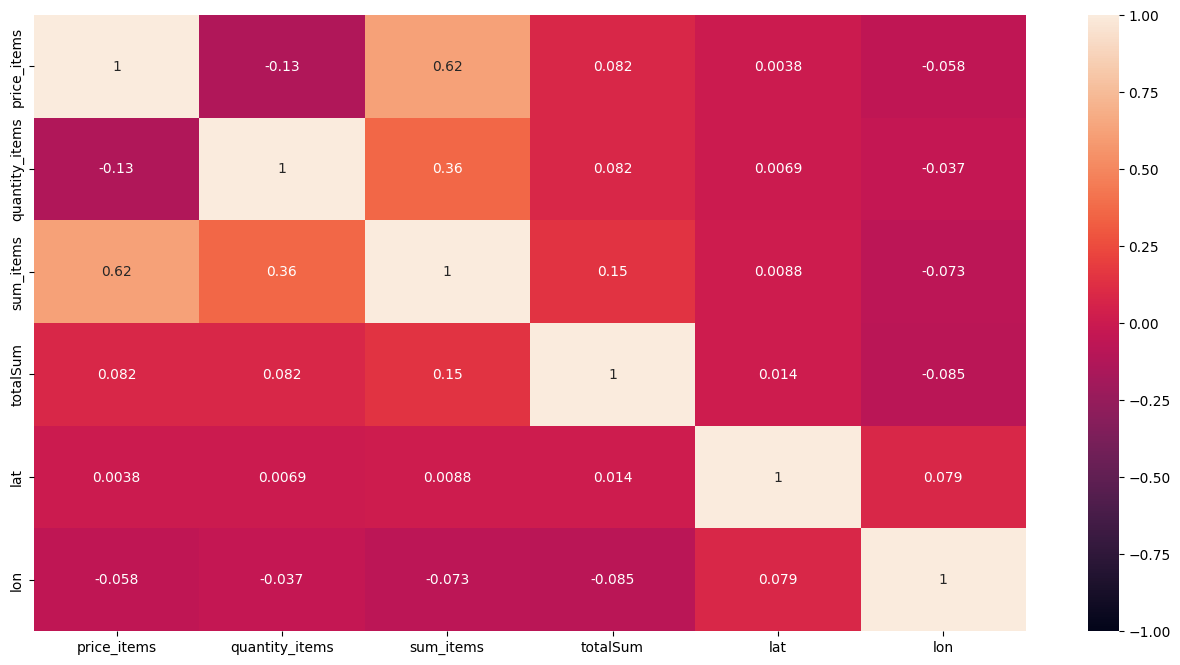

In [17]:
corr = data[['price_items', 'quantity_items', 'sum_items', 'totalSum', 'lat', 'lon']]
sns.heatmap(corr.corr(), vmax=1, vmin=-1, annot=True)

Практически везде слабая корреляционная зависимость, за исключением средней корреляционной зависимости sum_items - price_items

Добавим новые столбцы hour и weekday. И переименуем столбец "Идентификатор покупателя" в customer_id

In [18]:
data['hour'] = pd.to_datetime(data.dateTime).dt.hour

weekdays = {
    0: '1.Понедельник',
    1: '2.Вторник',
    2: '3.Среда',
    3: '4.Четверг',
    4: '5.Пятница',
    5: '6.Суббота',
    6: '7.Воскресенье'
    }
data['weekday'] = pd.to_datetime(data.dateTime).dt.weekday.map(weekdays)

data = data.rename(columns={'Идентификатор покупателя': 'customer_id'})

C:\Temp\ipykernel_31224\2744415287.py:1: UserWarning: Parsing dates in %d.%m.%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['hour'] = pd.to_datetime(data.dateTime).dt.hour
C:\Temp\ipykernel_31224\2744415287.py:12: UserWarning: Parsing dates in %d.%m.%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['weekday'] = pd.to_datetime(data.dateTime).dt.weekday.map(weekdays)


Сформируем таблицу со средним чеком по часам во всех торговых сетях для сравнения:

In [19]:
data.pivot_table(values='totalSum', index=['hour'], columns=['client_NT'], aggfunc='mean', observed=False)

client_NT,Metro c&c,Гиперглобус,Окей
hour,,,
0,NaN,4579.13,2569.96
1,NaN,3962.49,NaN
2,NaN,3395.87,NaN
3,NaN,3177.91,NaN
4,NaN,3987.50,NaN
5,8608.72,3691.40,NaN
6,2806.67,3741.31,NaN
7,41772.36,4309.55,NaN
8,29256.37,5011.39,3208.92


Аналогично сформируем таблицу со средним чеком по дням недели во всех торговых сетях для сравнения:

In [33]:
data.pivot_table(values='totalSum', index=['weekday'], columns=['client_NT'], aggfunc='mean', observed=False)

client_NT,Metro c&c,Гиперглобус,Окей
weekday,,,
1.Понедельник,11293.73,4587.84,3825.63
2.Вторник,11669.97,4610.98,3863.20
3.Среда,13145.15,4780.04,3583.95
4.Четверг,14904.70,4852.92,4070.30
5.Пятница,31170.95,5268.22,4250.20
6.Суббота,22183.15,5156.93,4592.69
7.Воскресенье,5931.00,4790.51,4106.22


In [34]:
data[data['client_NT'] == 'Окей'].pivot_table(values='totalSum', index=['weekday'], columns=['text_kktAddress'], aggfunc='mean', observed=False)

text_kktAddress,"г Москва, Московский п, г Московский, ул Хабарова, д 2","г Москва, пр-кт Мира, д 211 к 2","г Москва, ул Кировоградская, д 13А","г Москва, ул Озёрная, д 50","г Москва, ул Святоозерская, д 1А","г Москва, ш Головинское, д 5 к 1","г Москва, ш Дмитровское, влд 163А к 1","г Москва, ш Дмитровское, д 163А","г Москва, ш Дмитровское, д 98С","г Москва, ш Каширское, д 14","г Москва, ш Дмитровское, д 49Д","г Москва, ш Дмитровское, влд 163А","г Москва, ш Дмитровское, д 107А","г Москва, ш Дмитровское, к 1","г Москва, ш Дмитровское, влд 91А","г Москва, ш Дмитровское, д 165","г Москва, ш Дмитровское, д 58А","г Москва, ш Дмитровское, д 41","г Москва, ш Дмитровское, д 107 стр 2а","г Москва, ш Дмитровское, д 157 стр 2"
weekday,,,,,,,,,,,,,,,,,,,,
1.Понедельник,3574.59,3452.06,4314.15,3894.71,3694.01,2542.77,NaN,3790.44,3612.19,3982.07,1265.96,3613.09,4407.11,NaN,NaN,NaN,220.52,529.54,NaN,NaN
2.Вторник,3419.17,5126.15,3727.49,3760.41,3713.31,2603.74,1882.15,4013.24,4075.64,3979.29,11848.54,3507.90,4156.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.Среда,3479.50,3870.63,3020.77,3785.36,3577.18,1975.90,NaN,3771.53,3501.87,3842.98,3558.78,4307.63,3808.49,NaN,NaN,NaN,NaN,1144.59,NaN,NaN
4.Четверг,3565.73,3895.00,3618.21,4160.95,4073.55,2668.72,279.95,4327.72,4019.59,4362.12,7591.92,3790.44,4058.21,NaN,2402.26,NaN,770.58,1986.84,1919.70,1224.00
5.Пятница,3715.16,4677.24,4272.91,4025.55,4062.68,3296.20,NaN,4380.90,4533.21,4517.29,420.31,3746.04,4662.70,NaN,640.22,6615.59,5740.33,1588.37,NaN,NaN
6.Суббота,6299.37,5005.65,4434.92,4663.30,4233.58,3457.81,NaN,4982.62,4835.29,4704.20,176.62,3870.79,4689.91,NaN,4460.01,NaN,NaN,NaN,NaN,NaN
7.Воскресенье,5327.32,4533.33,3694.95,4137.46,3962.78,2944.07,NaN,4244.60,3834.39,4299.24,1050.97,4169.81,4114.05,162.95,576.26,NaN,NaN,130.22,2248.48,NaN


Проведём ABC-анализ для каждой троговой сети.

Классифицируем товары `CLEAN_SKU` по прибыли и количеству проданных позиций. А так же по `CATEGORY_NT` по количеству проданных позиций

In [22]:
def perform_abc(df, index):
    cols = list(df.columns)
    for i in index:
        cols.remove(i)
    groupped_df = df.groupby(index[1]).agg({col: 'sum' for col in cols})
    for col in cols:
        groupped_df[f'rel_{col}'] = groupped_df[col] / sum(groupped_df[col])
        groupped_df = groupped_df.sort_values(f'rel_{col}', ascending=False)
        groupped_df[f'cumsum_{col}'] = groupped_df[f'rel_{col}'].cumsum()
        groupped_df[f'abc_{col}'] = np.where(groupped_df[f'cumsum_{col}'] < 0.8, 'A', np.where(groupped_df[f'cumsum_{col}'] < 0.95, 'B', 'C'))
    return groupped_df[cols + [f'abc_{col}' for col in cols]]

In [23]:
abc_all_SKU = data[['client_NT', 'CLEAN_SKU', 'price_items', 'quantity_items']].dropna()
abc_all_SKU

,client_NT,CLEAN_SKU,price_items,quantity_items
0,Окей,Бананы кг,70.38,0.59
1,Окей,Зажарка Maggi 60г,33.42,1.00
2,Окей,Бананы кг,96.24,0.91
3,Окей,Яблоки кг,87.49,1.30
4,Окей,Апельсины кг,109.99,1.69
...,...,...,...,...
2400094,Окей,Кондиционер конц д/белья Vernel supreme elegan...,199.99,1.00
2400095,Окей,Абрикосы 500г упак,169.99,1.00
2400096,Окей,Пакет подарочный Арт и Дизайн ST премиум 12х36см,102.99,1.00
2400097,Окей,"Вино Вадиаперти Греко Ди Туфо бел. сух. 4,5-16...",1099.02,1.00


In [24]:
abc_SKU = pd.DataFrame()
for trade in trades:
    tmp = pd.DataFrame()
    tmp = perform_abc(abc_all_SKU[abc_all_SKU['client_NT'] == trade], ['client_NT', 'CLEAN_SKU']).reset_index()
    tmp['client_NT'] = trade
    abc_SKU = pd.concat([abc_SKU, tmp], ignore_index=True).dropna()
abc_SKU

,CLEAN_SKU,price_items,quantity_items,abc_price_items,abc_quantity_items,client_NT
0,Пакет из переработанного материала Kinglet 40х...,67268.21,9074.00,A,A,Окей
1,Бананы кг,652318.31,8526.12,A,A,Окей
2,"БЗМЖ Молоко утп Домик в деревне 3,2% 925мл тба",312110.16,7176.00,A,A,Окей
3,Картофель ранний импортный кг,252049.86,6234.26,A,A,Окей
4,"Сахар-песок бел. кристал. ГОСТ 33222-2015, кат...",199892.50,5130.00,A,A,Окей
...,...,...,...,...,...,...
71228,630Г КОЛБАСА ОКРАИНА ЗЕРНИСТАЯ С/К,565.59,0.34,A,C,Metro c&c
71229,САЛАТ АЙСБЕРГ,159.01,0.31,B,C,Metro c&c
71230,ЧЕСНОК,196.96,0.31,B,C,Metro c&c
71231,ВИШНЯ,239.00,0.21,B,C,Metro c&c


In [25]:
abc_all_CATEGORY = data[['client_NT', 'CATEGORY_NT', 'quantity_items']].dropna()
abc_all_CATEGORY

,client_NT,CATEGORY_NT,quantity_items
0,Окей,ФРУКТЫ ОСНОВНЫЕ,0.59
1,Окей,ПРИПРАВЫ ДЛЯ ПЕРВЫХ И ВТОРЫХ БЛЮД,1.00
2,Окей,ФРУКТЫ ОСНОВНЫЕ,0.91
3,Окей,ФРУКТЫ ОСНОВНЫЕ,1.30
5,Окей,ОВОЩИ РАЗНЫЕ,0.41
...,...,...,...
2400094,Окей,СР-ВА ДЛЯ СТИРКИ,1.00
2400095,Окей,ФРУКТЫ ОСНОВНЫЕ,1.00
2400096,Окей,ВСЕ ДЛЯ ВЕСЕЛОГО ПРАЗДНИКА,1.00
2400097,Окей,ВИНО,1.00


In [26]:
abc_CATEGORY = pd.DataFrame()
for trade in trades:
    tmp = pd.DataFrame()
    tmp = perform_abc(abc_all_CATEGORY[abc_all_CATEGORY['client_NT'] == trade], ['client_NT', 'CATEGORY_NT']).reset_index()
    tmp['client_NT'] = trade
    abc_CATEGORY = pd.concat([abc_CATEGORY, tmp], ignore_index=True).dropna()
abc_CATEGORY = abc_CATEGORY.rename(columns={'abc_quantity_items': 'abc_quantity_items_CAT'})
abc_CATEGORY


C:\Temp\ipykernel_31224\3440270023.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupped_df = df.groupby(index[1]).agg({col: 'sum' for col in cols})
C:\Temp\ipykernel_31224\3440270023.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupped_df = df.groupby(index[1]).agg({col: 'sum' for col in cols})
C:\Temp\ipykernel_31224\3440270023.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupped_df = df.groupby(

,CATEGORY_NT,quantity_items,abc_quantity_items_CAT,client_NT
0,"ЗООКОРМ, ЛАКОМСТВА ДЛЯ КОШЕК",51633.00,A,Окей
1,ТВОРОЖНАЯ ГРУППА,29286.00,A,Окей
2,ВОДА,29043.00,A,Окей
3,МОЛОКО,28928.00,A,Окей
4,КОРНЕПЛОДЫ,28415.69,A,Окей
...,...,...,...,...
1279,"ШАРФЫ, ПАЛАНТИНЫ, ПАРЕО",0.00,C,Metro c&c
1280,САКЕ,0.00,C,Metro c&c
1281,БАЛЬЗАМ,0.00,C,Metro c&c
1282,НОСИТЕЛИ ИНФОРМАЦИИ С ЗАПИСЬЮ,0.00,C,Metro c&c


In [27]:
xyz_data = data[['client_NT', 'CLEAN_SKU', 'dateTime', 'quantity_items']]
xyz_data['dateTime'] = pd.to_datetime(xyz_data['dateTime']).dt.strftime('%W') # По неделям
xyz_data

C:\Temp\ipykernel_31224\347484163.py:2: UserWarning: Parsing dates in %d.%m.%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  xyz_data['dateTime'] = pd.to_datetime(xyz_data['dateTime']).dt.strftime('%W') # По неделям
C:\Temp\ipykernel_31224\347484163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xyz_data['dateTime'] = pd.to_datetime(xyz_data['dateTime']).dt.strftime('%W') # По неделям


,client_NT,CLEAN_SKU,dateTime,quantity_items
0,Окей,Бананы кг,25,0.59
1,Окей,Зажарка Maggi 60г,25,1.00
2,Окей,Бананы кг,17,0.91
3,Окей,Яблоки кг,17,1.30
4,Окей,Апельсины кг,22,1.69
...,...,...,...,...
2400094,Окей,Кондиционер конц д/белья Vernel supreme elegan...,20,1.00
2400095,Окей,Абрикосы 500г упак,20,1.00
2400096,Окей,Пакет подарочный Арт и Дизайн ST премиум 12х36см,21,1.00
2400097,Окей,"Вино Вадиаперти Греко Ди Туфо бел. сух. 4,5-16...",21,1.00


In [28]:
def perform_xyz(df, date_col, index_cols, value_col):
    # Группировка и агрегация (сумма quantity_items по неделям)
    grouped = df.groupby(index_cols + [date_col])[value_col].sum().reset_index()
    # Фильтрация SKU с достаточным количеством недель (>1)
    sku_week_counts = grouped.groupby(index_cols)[date_col].count().reset_index()
    valid_skus = sku_week_counts[sku_week_counts[date_col] > 1][index_cols]
    filtered = pd.merge(grouped, valid_skus, on=index_cols)
    
    # Расчет коэффициента вариации
    cv_result = (filtered.groupby(index_cols)[value_col]
                 .apply(lambda x: x.std()/x.mean())
                 .reset_index(name='cv'))
    
    # 6. Классификация XYZ
    cv_result['XYZ'] = np.where(cv_result['cv'] < 0.1, 'X', np.where(cv_result['cv'] < 0.25, 'Y', 'Z'))
    
    return cv_result

In [29]:
xyz_SKU = pd.DataFrame()
for trade in trades:
    tmp = pd.DataFrame()
    tmp = perform_xyz(xyz_data[xyz_data['client_NT'] == trade], date_col='dateTime', index_cols=['CLEAN_SKU'], value_col='quantity_items')
    tmp['client_NT'] = trade
    xyz_SKU = pd.concat([xyz_SKU, tmp], ignore_index=True).dropna()
xyz_SKU

,CLEAN_SKU,cv,XYZ,client_NT
0,"""Ассорти """"Черри и корнишоны"""" 500г""",0.00,X,Окей
1,"""Ассорти овощное """"Пятерка"""" 1000г""",0.47,Z,Окей
2,"""БЗМЖ сыр """"Моне"""" с массовой долей жира 45% (...",0.34,Z,Окей
3,"""Бальзам Травяной 250 мл """"Живая природа"""" (Ок...",0.29,Z,Окей
4,"""Батончик мюсли """"О'кей"""" вишня с цельными зла...",0.77,Z,Окей
...,...,...,...,...
52672,ТОМАТЫ ВЕС (КГ),0.81,Z,Metro c&c
52673,ТУШКА ЦБ СТМ MC ПАКЕТ ОХЛ (КГ),0.01,X,Metro c&c
52674,ФИЛЕ КУРИНОЕ METRO CHEF МИНИКОРОБ ОХЛ (КГ),0.05,X,Metro c&c
52675,ЯБЛОКИ ГРЕННИ СМИТ ВЕС (КГ),0.52,Z,Metro c&c


Теперь соединим результаты abc_SKU, abc_CATEGORY, xyz_SKU в один датафрейм и выгрузим в pickle-файл

In [30]:
analysis_df = pd.DataFrame()
analysis_df = pd.merge(data, abc_SKU, on=['client_NT', 'CLEAN_SKU'], how='left')
analysis_df = pd.merge(analysis_df, abc_CATEGORY, on=['client_NT', 'CATEGORY_NT'], how='left')
analysis_df = pd.merge(analysis_df, xyz_SKU, on=['client_NT', 'CLEAN_SKU'], how='left')
analysis_df = analysis_df[['client_NT', 'text_kktAddress', 
                            'customer_id', 'dateTime', 'receipt_id', 'CLEAN_SKU', 'price_items_x',
                            'abc_price_items', 'abc_quantity_items', 'abc_quantity_items_CAT', 'XYZ', 
                            'quantity_items', 'sum_items', 'totalSum',
                            'RIGHTHOLDER_NT', 'BRAND_NT', 'CLASS_NT', 'GROUP_NT', 'CATEGORY_NT',
                            'SUBCATEGORY_NT', 'BASE_NT', 'lat', 'lon']]
analysis_df

,client_NT,text_kktAddress,customer_id,dateTime,receipt_id,CLEAN_SKU,price_items_x,abc_price_items,abc_quantity_items,abc_quantity_items_CAT,...,totalSum,RIGHTHOLDER_NT,BRAND_NT,CLASS_NT,GROUP_NT,CATEGORY_NT,SUBCATEGORY_NT,BASE_NT,lat,lon
0,Окей,"г Москва, ул Озёрная, д 50",NaN,26.06.2022 13:51:00,9960440300975081:17128,Бананы кг,70.38,A,A,A,...,2135.82,NaN,NaN,ФРОВ,СВЕЖИЕ ФРУКТЫ,ФРУКТЫ ОСНОВНЫЕ,БАНАНЫ,БАНАН,55.66,37.44
1,Окей,"г Москва, ул Озёрная, д 50",NaN,26.06.2022 13:46:00,9960440300975081:17126,Зажарка Maggi 60г,33.42,B,A,A,...,3920.33,NESTLE,MAGGI,БАКЛ,БАКАЛЕЯ СЫПУЧАЯ,ПРИПРАВЫ ДЛЯ ПЕРВЫХ И ВТОРЫХ БЛЮД,ПРИПРАВА ДЛЯ ЖАРКОЕ,ПРИПРАВА ДЛЯ ЖАРКОЕ,55.66,37.44
2,Окей,"г Москва, ул Озёрная, д 50",NaN,01.05.2022 13:26:00,9960440300975081:11611,Бананы кг,96.24,A,A,A,...,2387.77,NaN,NaN,ФРОВ,СВЕЖИЕ ФРУКТЫ,ФРУКТЫ ОСНОВНЫЕ,БАНАНЫ,БАНАН,55.66,37.44
3,Окей,"г Москва, ул Озёрная, д 50",NaN,01.05.2022 13:26:00,9960440300975081:11611,Яблоки кг,87.49,A,A,A,...,2387.77,NaN,NaN,ФРОВ,СВЕЖИЕ ФРУКТЫ,ФРУКТЫ ОСНОВНЫЕ,ЯБЛОКИ,ЯБЛОКО,55.66,37.44
4,Окей,"г Москва, ул Озёрная, д 50",NaN,04.06.2022 18:19:00,9960440301010969:5365,Апельсины кг,109.99,A,A,NaN,...,13641.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.66,37.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400094,Окей,"г Москва, ул Кировоградская, д 13А",NaN,21.05.2022 18:02:00,9960440300963884:53239,Кондиционер конц д/белья Vernel supreme elegan...,199.99,B,B,A,...,818.97,не определено,VERNEL,КЗБХ,БЫТОВАЯ ХИМИЯ,СР-ВА ДЛЯ СТИРКИ,КОНДИЦИОНЕР-ОПОЛАСКИВАТЕЛЬ,КОНДИЦИОНЕР ДЛЯ БЕЛЬЯ,55.61,37.61
2400095,Окей,"г Москва, ул Кировоградская, д 13А",NaN,21.05.2022 18:02:00,9960440300963884:53239,Абрикосы 500г упак,169.99,A,A,A,...,818.97,NaN,NaN,ФРОВ,СВЕЖИЕ ФРУКТЫ,ФРУКТЫ ОСНОВНЫЕ,АБРИКОС,АБРИКОС,55.61,37.61
2400096,Окей,"г Москва, ул Кировоградская, д 13А",8e72f68f3891ce5f91503cb8dbe1b210,26.05.2022 18:08:00,9960440300964629:76254,Пакет подарочный Арт и Дизайн ST премиум 12х36см,102.99,C,C,C,...,1832.00,не определено,АРТ И ДИЗАЙН,КЦИГ,ИГРУШКИ,ВСЕ ДЛЯ ВЕСЕЛОГО ПРАЗДНИКА,ПОДАРОЧНЫЕ ПАКЕТЫ И УПАКОВКА,ПАКЕТ ПОДАРОЧНЫЙ,55.61,37.61
2400097,Окей,"г Москва, ул Кировоградская, д 13А",8e72f68f3891ce5f91503cb8dbe1b210,26.05.2022 18:08:00,9960440300964629:76254,"Вино Вадиаперти Греко Ди Туфо бел. сух. 4,5-16...",1099.02,B,C,B,...,1832.00,NaN,NaN,АЛКГ,ВИНО,ВИНО,ВИНО ТИХОЕ,ВИНО ТИХОЕ,55.61,37.61


In [31]:
# Сохраним результаты ABC|XYZ-анализа в pcl файл
analysis_df.to_pickle('ABC-XYZ.pcl.gz', compression='gzip')
# Можно скачать его https://disk.yandex.ru/d/aVAb0DY98upb3w

In [32]:
# Если надо загрузить, то можно воспользоваться:
# abc_xyz = pd.read_pickle('ABC-XYZ.pcl.gz', compression='gzip')

Сформируем csv-файлы по торговым сетям

In [40]:
for trade in trades:
    analysis_df[analysis_df['client_NT'] == trade].to_csv(f'ABC-XYZ {trade}.csv', index=False)

Сравним цены на одинаковые товары в разных торговых сетях.

Составим сводную таблицу по категориям товара (`CATEGORY_NT`). Столбцами будут торговые сети, а в качестве значений будет средняя цена по категории.

In [73]:
data.pivot_table(
    index='CATEGORY_NT',
    columns='client_NT',
    values='price_items',
    aggfunc='mean'
).sort_index()

C:\Temp\ipykernel_31224\4101350479.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  data.pivot_table(


client_NT,Metro c&c,Гиперглобус,Окей
CATEGORY_NT,,,
АКСЕССУАРИКА,NaN,389.48,429.44
АКСЕССУАРЫ,NaN,215.04,228.87
АКСЕССУАРЫ ДЛЯ ОБУВИ,NaN,175.51,210.36
АКСЕССУАРЫ ДЛЯ ПРОГУЛКИ И ДРЕССИРОВКИ ЖИВОТНЫХ,NaN,211.44,258.78
АССОРТИ МЯСНОЙ ГАСТРОНОМИИ,NaN,377.21,151.43
...,...,...,...
"СИГАРЫ, СИГАРИЛЫ",NaN,200.00,NaN
"НАКЛАДКИ, ВКЛАДЫШИ, ПРОКЛАДКИ ДЛЯ БЕРЕМЕННЫХ И КОРМЯЩИХ",NaN,244.00,NaN
МЯСО УТКИ ЗАМОРОЖЕННОЕ,NaN,NaN,346.86
